<a href="https://colab.research.google.com/github/mesrp88/ml_work/blob/main/cars_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
cars = pd.read_csv('auto.csv')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
cars['origin'].unique()

array([1, 3, 2], dtype=int64)

In [ ]:
cylinder_dummies= pd.get_dummies(cars['cylinders'], prefix='cyl')
print(cylinder_dummies)
year_dummies= pd.get_dummies(cars['year'], prefix= 'year')
cars= pd.concat([cars, cylinder_dummies, year_dummies], axis=1)

cars.head()

     cyl_3  cyl_4  cyl_5  cyl_6  cyl_8
0        0      0      0      0      1
1        0      0      0      0      1
2        0      0      0      0      1
3        0      0      0      0      1
4        0      0      0      0      1
..     ...    ...    ...    ...    ...
387      0      1      0      0      0
388      0      1      0      0      0
389      0      1      0      0      0
390      0      1      0      0      0
391      0      1      0      0      0

[392 rows x 5 columns]


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,cyl_3,cyl_4,...,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cars.drop(['cylinders', 'year'],axis=1, inplace=True)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 24 columns):
mpg             392 non-null float64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
origin          392 non-null int64
cyl_3           392 non-null uint8
cyl_4           392 non-null uint8
cyl_5           392 non-null uint8
cyl_6           392 non-null uint8
cyl_8           392 non-null uint8
year_70         392 non-null uint8
year_71         392 non-null uint8
year_72         392 non-null uint8
year_73         392 non-null uint8
year_74         392 non-null uint8
year_75         392 non-null uint8
year_76         392 non-null uint8
year_77         392 non-null uint8
year_78         392 non-null uint8
year_79         392 non-null uint8
year_80         392 non-null uint8
year_81         392 non-null uint8
year_82         392 non-null uint8
dtypes: float64(5), int64(1), uint8(18)
memor

In [ ]:
import numpy as np
shuffled_rows = np.random.permutation(cars.index)    #creatig list of shuffled index
print(shuffled_rows)                                 #printing
shuffled_cars = cars.iloc[shuffled_rows]             #extracting rows according to shuffled
print(shuffled_cars)
choosed_rows= cars.iloc[[1,5,7]]
print(choosed_rows)
size=int(len(cars)*0.70)
train= shuffled_cars.iloc[0:size]                   #data is divided into train set
test= shuffled_cars.iloc[size:]                     #data is divided into test set


[292  51 132 141 373 203 185 237  70  50 323  89 223 157 156 206 362 264
 274 158 288 126 280 335  85 275 391 318 186 169 293 108 162 246 202 116
  61 128 173 322 304 269 238 152 290 385 226  20  86  31  57 216 183 213
 348  77 163 296 232 319 229 164 242 332 270  26 340  98 265  41  37 220
  22 345 295 308 388 328 351 313 181 234  49 278  96 325 299 124  46  42
 172 197 390  87 252 271   5 389 198 383  35 375 190 161 119 282 147 218
 118 174 384 316 104  24 379 352 136  32 209 122 130 347 165  43 145 107
 243 365 297  64 224 177 367 168 160 363  65 329 261 327 267 366  53 179
  71  76   6   7 188 244 355 360  55 370 121 101 273 123 217 259 133  69
 306   8 120 276 140  39 268 339  68  97 353 350  27 298 138 148 150 305
 287 111 144   2 309  59 333  10 283  82 387  54  93 284 331 257 211 199
 341 159 250 239   0 215  16 285 176  99 346 115  28  95 310 230 378  12
 336 155  66  30 289 221 326  45 151 117  84 251 337 260 386  60 193  17
 344 364 357  80 321 248 317 175  58 228 249  56 20

In [ ]:
unique_values= cars['origin'].unique()
print(unique_values.sort())

None


In [ ]:
for i in unique_values:
    print(i)
    

1
2
3


In [ ]:
numbers= [1,7,3,5,8]
numbers.sort()
print(numbers)

[1, 3, 5, 7, 8]


In [ ]:
cars.loc[:, 'cyl_3':]

,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8,year_70,year_71,year_72,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
388,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
389,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
390,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
features = [c for c in train.columns if c.startswith("cyl") or c.startswith("year")]
features

['cyl_3',
 'cyl_4',
 'cyl_5',
 'cyl_6',
 'cyl_8',
 'year_70',
 'year_71',
 'year_72',
 'year_73',
 'year_74',
 'year_75',
 'year_76',
 'year_77',
 'year_78',
 'year_79',
 'year_80',
 'year_81',
 'year_82']

In [ ]:
y_train= train['origin']==1
y_train

292    False
51     False
132     True
141    False
373     True
       ...  
359     True
189     True
75     False
102     True
167     True
Name: origin, Length: 274, dtype: bool

In [ ]:
from sklearn.linear_model import LogisticRegression

unique_origins = cars["origin"].unique()
unique_origins.sort()
X_train= train.loc[:, 'cyl_3':]

models = {}
for origin in unique_origins:
    lr= LogisticRegression()
    y_train= train['origin']==origin
    lr.fit(X_train, y_train)
    models[origin]= lr
    

In [ ]:
models

{1: LogisticRegression(), 2: LogisticRegression(), 3: LogisticRegression()}

In [ ]:
testing_probs = pd.DataFrame(columns=unique_origins)
testing_probs

,1,2,3


In [ ]:
for i in unique_origins:
    testing_probs[i]=models[i].predict_proba(test[features])[:,1]

In [ ]:
testing_probs.head()

,1,2,3
0,0.835188,0.127711,0.039355
1,0.583146,0.104900,0.323219
2,0.195334,0.301915,0.515762
3,0.393671,0.290270,0.295931
4,0.413367,0.316035,0.253600


In [ ]:
predicted_origins= testing_probs.idxmax(axis=1)
print(predicted_origins)

0      1
1      1
2      3
3      1
4      1
      ..
113    1
114    1
115    1
116    1
117    1
Length: 118, dtype: int64


In [ ]:
import pandas as pd
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names=columns)
filtered_cars = cars[cars['horsepower'] != '?'].copy()
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

In [ ]:
filtered_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def train_and_test(cols):
    features= filtered_cars[cols]
    target= filtered_cars['mpg']
    liner= LinearRegression()
    liner.fit(features, target)
    predictions= liner.predict(features)
    mse= mean_squared_error(filtered_cars['mpg'], predictions)
    variance= np.var(predictions)
    return (mse, variance)

cyl_mse, cyl_var = train_and_test(["cylinders"])
weight_mse, weight_var = train_and_test(["weight"])

In [ ]:
cyl_mse, cyl_var

(24.02017956815553, 36.74255887416017)

In [ ]:
weight_mse, weight_var

(18.6766165974193, 42.08612184489641)

In [ ]:
one_mse, one_var = train_and_test(["cylinders"])
two_mse, two_var = train_and_test(["cylinders", "displacement"])
three_mse, three_var= train_and_test(["cylinders", "displacement", "horsepower"])
four_mse, four_var=train_and_test(["cylinders", "displacement","horsepower", "weight"])
five_mse, five_var= train_and_test(["cylinders", "displacement","horsepower", "weight", "acceleration"])
six_mse, six_var=  train_and_test(["cylinders", "displacement","horsepower", "weight", "acceleration", "model year"])
seven_mse,seven_var=  train_and_test(["cylinders", "displacement","horsepower", "weight", "acceleration", "model year", "origin"])

In [ ]:
dicts= {"MSE":[one_mse, two_mse, three_mse, four_mse, five_mse, six_mse, seven_mse],
       "VAR":[one_var, two_var, three_var, four_var,five_var, six_var, seven_var]}
mse_var= pd.DataFrame(dicts, index=[i for i in range(1,8)])
mse_var

,MSE,VAR
1,24.020180,36.742559
2,21.282057,39.480681
3,20.252955,40.509784
4,17.763861,42.998878
5,17.761396,43.001342
6,11.590171,49.172567
7,10.847481,49.915257


we can see all mse decress value of var goes on increasing


In [ ]:
[i for i in range(1,7)]

[1, 2, 3, 4, 5, 6]

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import numpy as np

def train_and_cross_val(cols):
    features= filtered_cars[cols]
    target= filtered_cars['mpg']
    val_mse= [] 
    val_var= []
    kf= KFold(n_splits= 10, shuffle= True, random_state= 3)
    for train_index, test_index in kf.split(features):
        X_train, X_test= features.iloc[train_index], features.iloc[test_index]
        y_train, y_test= target.iloc[train_index], target.iloc[test_index]
        lr= LinearRegression()
        lr.fit(X_train, y_train)
        predictions= lr.predict(X_test)
        mse= mean_squared_error(y_test, predictions)
        var= np.var(predictions)
        val_mse.append(mse)
        val_var.append(var)
    avg_mse= np.mean(val_mse)
    avg_var= np.mean(val_var)
    return (avg_mse, avg_var)



        
        
        
    

In [ ]:
two_mse, two_var=train_and_cross_val(['cylinders', 'displacement'])
three_mse, three_var= train_and_cross_val(['cylinders', 'displacement', 'horsepower'])
four_mse, four_var= train_and_cross_val(['cylinders', 'displacement','horsepower', 'weight'])
five_mse, five_var= train_and_cross_val(['cylinders', 'displacement','horsepower', 'weight', 'acceleration'])
six_mse, six_var= train_and_cross_val(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year'])
seven_mse, seven_var= train_and_cross_val(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'])


In [ ]:
dicts_2= {"MSE":[two_mse, three_mse, four_mse, five_mse, six_mse, seven_mse],
       "VAR":[two_var, three_var, four_var,five_var, six_var, seven_var]}
mse_var= pd.DataFrame(dicts_2, index=[i for i in range(1,7)])
mse_var

,MSE,VAR
1,21.584370,38.902525
2,20.655622,40.091288
3,18.169683,42.507644
4,18.283039,42.598736
5,12.099685,48.928247
6,11.418132,49.904314


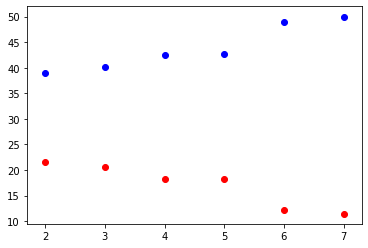

In [ ]:
import matplotlib.pyplot as plt
plt.scatter([2,3,4,5,6,7], [two_mse, three_mse, four_mse, five_mse, six_mse, seven_mse], color='red', label='mse')
plt.scatter([2,3,4,5,6,7], [two_var, three_var, four_var,five_var, six_var, seven_var], color='blue', label='var')
plt.show()